In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
# load data

mon = pd.read_csv('./_data/monday.csv',  delimiter =';', index_col='timestamp',parse_dates=True)
tue = pd.read_csv('./_data/tuesday.csv',  delimiter =';', index_col='timestamp',parse_dates=True)
wed = pd.read_csv('./_data/wednesday.csv',  delimiter =';', index_col='timestamp',parse_dates=True)
thu = pd.read_csv('./_data/thursday.csv',  delimiter =';', index_col='timestamp',parse_dates=True)
fri = pd.read_csv('./_data/friday.csv',  delimiter =';', index_col='timestamp',parse_dates=True)

In [3]:
mon['customer_no'].max() +tue['customer_no'].max()+wed['customer_no'].max()+thu['customer_no'].max()+fri['customer_no'].max()

7445

In [4]:
d = pd.DataFrame([[0,0]],columns=['timestamp','cx_id']).set_index('timestamp')

for e in [mon,tue,wed,thu,fri]:    
    e['cx_id'] = d['cx_id'].max() + e['customer_no']
    d = pd.concat([d,e])

df=d.iloc[1:]

df

,cx_id,customer_no,location
timestamp,,,
2019-09-02 07:03:00,1,1.0,dairy
2019-09-02 07:03:00,2,2.0,dairy
2019-09-02 07:04:00,3,3.0,dairy
2019-09-02 07:04:00,4,4.0,dairy
2019-09-02 07:04:00,5,5.0,spices
...,...,...,...
2019-09-06 21:50:00,7435,1500.0,dairy
2019-09-06 21:50:00,7442,1507.0,checkout
2019-09-06 21:50:00,7443,1508.0,checkout


In [5]:
df.index

Index([2019-09-02 07:03:00, 2019-09-02 07:03:00, 2019-09-02 07:04:00,
       2019-09-02 07:04:00, 2019-09-02 07:04:00, 2019-09-02 07:04:00,
       2019-09-02 07:04:00, 2019-09-02 07:04:00, 2019-09-02 07:05:00,
       2019-09-02 07:05:00,
       ...
       2019-09-06 21:49:00, 2019-09-06 21:49:00, 2019-09-06 21:49:00,
       2019-09-06 21:49:00, 2019-09-06 21:50:00, 2019-09-06 21:50:00,
       2019-09-06 21:50:00, 2019-09-06 21:50:00, 2019-09-06 21:50:00,
       2019-09-06 21:50:00],
      dtype='object', name='timestamp', length=24877)

In [6]:
df.index = pd.to_datetime(df.index)

---
# EDA 
### (not finished, 2/5)
---


## 1. Calculate the total number of customers in each section

In [7]:
df['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [8]:
df.groupby(df.index.day_name())['location'].value_counts().unstack()

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
Friday,1502,932,844,1057,790
Monday,1437,895,797,1005,750
Thursday,1532,965,776,1041,790
Tuesday,1420,911,713,976,694
Wednesday,1526,976,775,1043,730


## 2. Calculate the total number of customers in each section over time

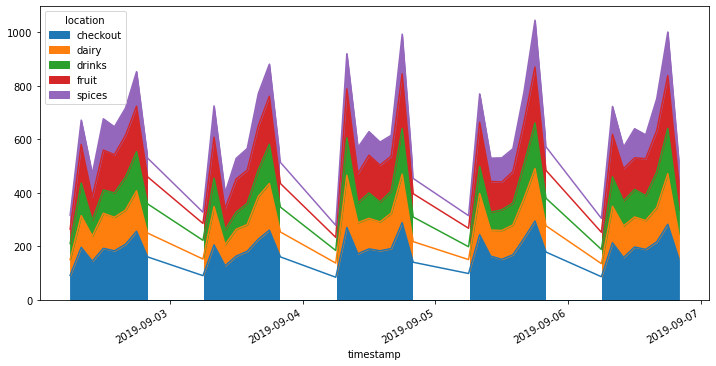

In [9]:
sub = df.resample('2h')['location'].value_counts().unstack()
sub.plot(kind='area')

x1 = pd.date_range('2019-09-02 20:0', '2019-09-05 20:00', freq='1d')
x2 = pd.date_range('2019-09-03 6:00', '2019-09-06 6:00', freq='1d')
x = pd.DataFrame(data=[x1,x2]).transpose()
x

#for col in x.columns:
#    x[col] = pd.to_datetime(x[col])
for ix, row in x.iterrows():
    plt.fill_between(row, 2700, color='white', alpha=1)

In [10]:
sub2 = df.groupby(df.index.day_name())['location'].value_counts().unstack()
sub2

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
Friday,1502,932,844,1057,790
Monday,1437,895,797,1005,750
Thursday,1532,965,776,1041,790
Tuesday,1420,911,713,976,694
Wednesday,1526,976,775,1043,730


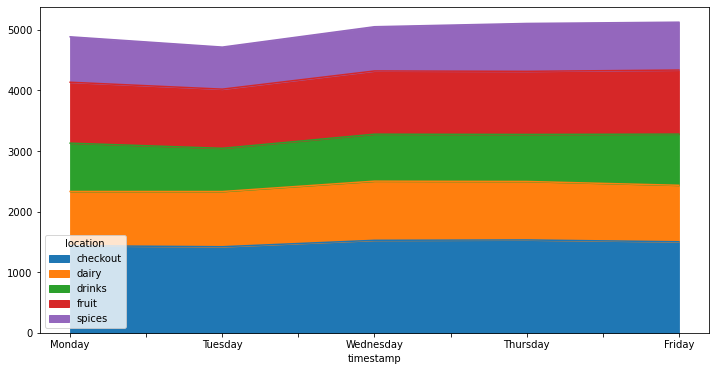

In [11]:
sub2.reindex(['Monday', 'Tuesday','Wednesday','Thursday','Friday']).plot(kind='area',stacked=True,
                                                                          sort_columns=True);

## 3. Display the number of customers at checkout over time

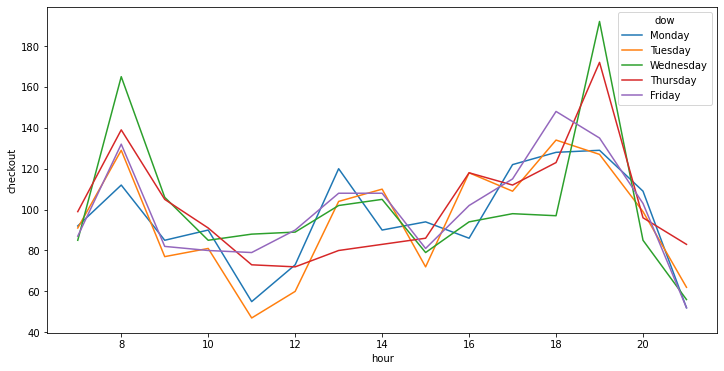

In [12]:
## could be prettier 
#df[df['location']=='checkout'].resample('1h')['location'].value_counts().unstack().plot();  #works
x = df[df['location']=='checkout'].resample('1h')['location'].value_counts().unstack()
x['dow'] = x.index.day_name()
x['hour'] = x.index.hour
sns.lineplot(y='checkout',x='hour',hue="dow", data=x);

## 4. Calculate the time each customer spent in the market

In [13]:
#df.groupby('cx_id')['location'].value_counts().unstack().head()

In [14]:
cx_df = df.drop(columns='customer_no').sort_values(['cx_id','timestamp'])#.reset_index()
cx_df

,cx_id,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:05:00,1,checkout
2019-09-02 07:03:00,2,dairy
2019-09-02 07:06:00,2,checkout
2019-09-02 07:04:00,3,dairy
...,...,...
2019-09-06 21:50:00,7442,checkout
2019-09-06 21:48:00,7443,dairy
2019-09-06 21:50:00,7443,checkout


In [15]:
dff = cx_df.reset_index()#.sort_values(['cx_id','timestamp'])#.head(20)

dff

,timestamp,cx_id,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:05:00,1,checkout
2,2019-09-02 07:03:00,2,dairy
3,2019-09-02 07:06:00,2,checkout
4,2019-09-02 07:04:00,3,dairy
...,...,...,...
24872,2019-09-06 21:50:00,7442,checkout
24873,2019-09-06 21:48:00,7443,dairy
24874,2019-09-06 21:50:00,7443,checkout
24875,2019-09-06 21:50:00,7444,drinks


In [16]:
##dff.pivot(index='cx_id', columns='location', values='timestamp')

## 5. Calculate the total number of customers in the supermarket over time.

## 6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

 ---
# Transition Probabilities

---

In [17]:
dff['next_loc'] = dff['location'].shift(-1)
dff['prev_loc'] = dff['location'].shift(+1)

dff['prev_loc'][0] = 'entrance'  
dff['next_loc'][len(dff)-1] = 'checkout'

for i in range(len(dff)):
    # add tag for removal 
    if dff['location'][i] == 'checkout':
        dff['next_loc'][i] = 'LEFT'
    elif i < len(dff)-1 and dff['cx_id'][i] != dff['cx_id'][i+1] and dff['location'][i] != 'checkout':
        dff['next_loc'][i] = 'checkout'

for i in range(1,len(dff)):
    j=i-1
#    print(j)
#    print (dff['location'][j])
#    print(i,'---',dff['cx_id'][i],'---',dff['cx_id'][j])
    if dff['cx_id'][i] != dff['cx_id'][j] :
        dff['prev_loc'][i] = 'entrance'

<ipython-input-17-fdf77158abee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['prev_loc'][0] = 'entrance'
<ipython-input-17-fdf77158abee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['next_loc'][len(dff)-1] = 'checkout'
<ipython-input-17-fdf77158abee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['next_loc'][i] = 'LEFT'
<ipython-input-17-fdf77158abee>:12: SettingWithCopyWarning: 
A value is trying to be set on a 

In [18]:
dff.head(10)

,timestamp,cx_id,location,next_loc,prev_loc
0,2019-09-02 07:03:00,1,dairy,checkout,entrance
1,2019-09-02 07:05:00,1,checkout,LEFT,dairy
2,2019-09-02 07:03:00,2,dairy,checkout,entrance
3,2019-09-02 07:06:00,2,checkout,LEFT,dairy
4,2019-09-02 07:04:00,3,dairy,checkout,entrance
5,2019-09-02 07:06:00,3,checkout,LEFT,dairy
6,2019-09-02 07:04:00,4,dairy,checkout,entrance
7,2019-09-02 07:08:00,4,checkout,LEFT,dairy
8,2019-09-02 07:04:00,5,spices,checkout,entrance
9,2019-09-02 07:05:00,5,checkout,LEFT,spices


In [19]:
dff.to_csv('whole_week_w_next_prev.csv')

In [20]:
dff.groupby('location')['next_loc'].value_counts().unstack()

next_loc,LEFT,checkout,dairy,drinks,fruit,spices
location,,,,,,
checkout,7417.0,NaN,NaN,NaN,NaN,NaN
dairy,NaN,1839.0,NaN,1041.0,886.0,913.0
drinks,NaN,2098.0,106.0,NaN,855.0,846.0
fruit,NaN,2562.0,1219.0,697.0,NaN,644.0
spices,NaN,946.0,1213.0,1024.0,571.0,NaN


In [21]:
probs = dff.groupby('location')['next_loc'].value_counts(normalize=True).unstack()

In [22]:
probs.iloc[:,1:]

next_loc,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,NaN,NaN,NaN,NaN,NaN
dairy,0.393033,NaN,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,NaN,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,NaN,0.125732
spices,0.251998,0.323122,0.272776,0.152104,NaN


In [23]:
dff[(dff['location'] == 'drinks') & (dff['next_loc'] == 'drinks')]

,timestamp,cx_id,location,next_loc,prev_loc


---------
# Classes  
### ---> only copied in some "framework"
---------


### For the project, we need: 
1. Initial state vector
2. Transition probability matrix
3. Think about how to include the checkout as an **absorbing state**.

🎯 Goal: Sequences of how customers move trough the supermarket.


In [24]:
state = Customer.first

NameError: name 'Customer' is not defined

**Which "objects" do we have in our supermarket project?**

- Customer
    - attributes: `.location`, `.arrival_time`, `.departure_time`, `.total_time`, `.current_basket`, `.budget`???, `.id`
    - methods: `.change_location()`, `.checkout()`
    
    

In [ ]:
class Customer: 
    
    """Customer for Supermarket Simulation"""
    
    #"initialization"
    def __init__(self, name):

        self.name = name
        self.location = 'entrance'

        
        self.possible_locations = [ 'dairy','drinks', 'fruits', 'spices', 'checkout']
    
    
    def __repr__(self):
        return f"Customer {self.name} is in the {self.location} section."
    
    
    def change_location(self):
        """Given some prob distribution, change location."""
        
        self.location = np.random.choice(self.possible_locations, p=probs) ### ????????????
        
        if self.location == 'checkout':
            print('Done!!!')
            print('The customer should be removed from the simulation.')

Each team should:
- write their own Customer Class
- use the probability matrix from the data analysis
- think of a way to "remove" customers from the simulation when they checkout
    - hint: consider creating a class for the SuperMarket

**Which "objects" do we have in our supermarket project?**
- Supermarket
    - attributes: `.open_time`, `.close_time`, `.aisles` / `.locations`, `.current_time`, `.num_employees`, `.customers`
    - methods: `.sell()`, `.close()`, `.move_all_customers()`, `.get_info(time, day)`

In [ ]:
class Zoo:

    def __init__(self):
        self.animals = []

    def add(self, animal):
        self.animals.append(animal)

    def make_all_sounds(self):
        for a in self.animals:
            a.make_sound()

z = Zoo()

You might want to have a SuperMarket which contains a method called `.next_minute()`
- Your supermarket class should contain many customers at a given point in time.
- Your supermarket class can loop through all the customers in a single method to make all the customers mode (e.g. `sm.customers[i].change_location()`)
- when any given customer is churned, i.e. `customers[i].location == 'checkout'`, remove the customer from the list.
- simultaneously, the supermarket should let in customers at a pre-defined rate.